DATASET

The dataset has the following list of attributes:

**Type of dependent variables (7 types of steel plates faults):**

| Attribute | No.	Attribute |
|--|--|
|1 | Pastry|
|2 | Z_Scratch|
|3 | K_Scratch|
|4 | Stains|
|5 | Dirtiness|
|6 | Bumps|
|7 | Other_Faults|

**27 independent variables:**

|Attribute No. |	Attribute | 	Attribute No. |	Attribute |
| -- | -- | -- | -- |
|1 |		X_Minimum |	15 |	Edges_Index |
|2 |		X_Maximum |	16 |	Empty_Index |
|3 |		Y_Minimum |	17 |	Square_Index |
|4 |		Y_Maximum |	18 |	Outside_X_Index |
|5 |		Pixels_Areas |	19 |	Edges_X_Index |
|6 |		X_Perimeter |	20 |	Edges_Y_Index |
|7 |		Y_Perimeter |	21 |	Outside_Global_Index |
|8 |		Sum_of_Luminosity |	22 |	LogOfAreas |
|9 |		Minimum_of_Luminosity |	23 |	Log_X_Index |
|10 |		Maximum_of_Luminosity |	24 |	Log_Y_Index |
|11 |		Length_of_Conveyer |	25 |	Orientation_Index |
|12 |		TypeOfSteel_A300 |	26 |	Luminosity_Index |
|13 |		TypeOfSteel_A400 |	27 |	SigmoidOfAreas |
|14 |		Steel_Plate_Thickness | |	 |	

Among the independent variables, only the steel types (12th and 13th) are categorical variables, the rest are numeric.

1) For this exercise use a neural network and see how well you could predict the type of faults in steel plates from numeric attributes only.

    Note: To save time and energy use the hidden layer numbers and number of nodes in hidden layers that your computer can handle.

In [14]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [15]:
#Importing the datset from file

column_names = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity'
                ,'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index'
                ,'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index'
                ,'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas','Pastry','Z_Scratch','K_Scratch','Stains','Dirtiness','Bumps','Other_Faults']

steel_faults_df = pd.read_csv('~/Documents/Code/IMT_574/Week9/Homework/dataset-Faults.csv', sep='\t', header= None, names=column_names) 

steel_faults_df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [16]:
#Function to "merge" all fault types into a single column
def merge_fault_types(row):

    fault = None
    
    for column in ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']:
        if row[column] == 1:
            fault = column
            
    return fault    


In [17]:

steel_faults_df['Fault_Class'] = steel_faults_df.apply(merge_fault_types, axis=1)
steel_faults_df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults,Fault_Class
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0026,0.7254,0,0,0,0,0,0,1,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.0582,0.8173,0,0,0,0,0,0,1,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0052,0.7079,0,0,0,0,0,0,1,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0171,0.9919,0,0,0,0,0,0,1,Other_Faults
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,-0.1139,0.5296,0,0,0,0,0,0,1,Other_Faults


**The dataset doesn't contain null or NaN values, no need for imputation or One-Hot encoding**

In [18]:
#Encoding the categorical variable Battle into integers
Encoder = LabelEncoder()
steel_faults_df['Target_Fault'] = Encoder.fit_transform(steel_faults_df['Fault_Class'])

In [19]:
#Dropping original Steel Fault columns
steel_faults_df.drop(['Pastry','Z_Scratch', 'K_Scratch','Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'Fault_Class', 'TypeOfSteel_A300', 'TypeOfSteel_A400'],axis=1, inplace=True)
steel_faults_df.tail()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target_Fault
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,3
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,3
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,3
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,3
1940,1261,1281,87951,87967,103,26,22,11682,101,133,...,0.7692,0.7273,0.0,2.0128,1.3010,1.2041,-0.2000,-0.1139,0.5296,3


In [20]:

X = steel_faults_df.copy()
y = steel_faults_df.pop('Target_Fault')

In [21]:
#Normalizing the features
#Create a MinMaxScaler instance: Instantiate a MinMaxScaler object. By default, it will scale the data to the range.
#Fit and transform the data: Use the fit_transform method on the scaler object to:
#Fit: Learn the minimum and maximum values from the data.
#Transform: Apply the scaling transformation to the data based on the learned values.

X = MinMaxScaler().fit_transform(X)

In [22]:
#Splitting dataset in training and testing 
X_train,X_test,y_train,y_test = train_test_split(X, y ,random_state=45,test_size=0.3)

In [23]:
#Creating the DNN model, with 4 hidden layers with 64 neurons each, and output layer with 7 neurons
tf.random.set_seed(42)

#It appears that after 4 hidden layers, there is no big improvement in accuracy
dnn_model = keras.Sequential([
    layers.Dense(64, activation=tf.keras.activations.relu),
    layers.Dense(64, activation=tf.keras.activations.relu), 
    layers.Dense(64, activation=tf.keras.activations.relu),      
    layers.Dense(64, activation=tf.keras.activations.relu), 
    # layers.Dense(64, activation=tf.keras.activations.relu),      
    # layers.Dense(64, activation=tf.keras.activations.relu), 
    # layers.Dense(64, activation=tf.keras.activations.relu),
    # layers.Dense(64, activation=tf.keras.activations.relu), 
    # layers.Dense(64, activation=tf.keras.activations.relu),      
    # layers.Dense(64, activation=tf.keras.activations.relu), 
    # layers.Dense(64, activation=tf.keras.activations.relu),      
    # layers.Dense(64, activation=tf.keras.activations.relu),  
    # layers.Dense(64, activation=tf.keras.activations.relu),
    # layers.Dense(64, activation=tf.keras.activations.relu), 
    # layers.Dense(64, activation=tf.keras.activations.relu),      
    # layers.Dense(64, activation=tf.keras.activations.relu), 
    # layers.Dense(64, activation=tf.keras.activations.relu),      
    # layers.Dense(64, activation=tf.keras.activations.relu), 
    # layers.Dense(64, activation=tf.keras.activations.relu),
    # layers.Dense(64, activation=tf.keras.activations.relu),  
    layers.Dense(7, activation=tf.keras.activations.softmax)
  ])


In [24]:
#Compiling the model, defining performance metrics and optimizer.
dnn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics=['accuracy'])



In [25]:
# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)) # traverse a set 
#of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

In [26]:
# 3. Fit the model
history  = dnn_model.fit(X_train, y_train
                            ,epochs=20
                            ,callbacks=[lr_scheduler]
                            ,validation_data=(X_test, y_test)
                            ,verbose=1) 

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2798 - loss: 1.7897 - val_accuracy: 0.5780 - val_loss: 1.3381 - learning_rate: 0.0010
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6169 - loss: 1.1896 - val_accuracy: 0.7393 - val_loss: 0.8253 - learning_rate: 0.0011
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.8048 - loss: 0.6773 - val_accuracy: 0.8336 - val_loss: 0.4859 - learning_rate: 0.0013
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8707 - loss: 0.3680 - val_accuracy: 0.9262 - val_loss: 0.2776 - learning_rate: 0.0014
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.9256 - loss: 0.2273 - val_accuracy: 0.9383 - val_loss: 0.1964 - learning_rate: 0.0016
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.9519 - loss: 0.1509 - val_accuracy: 0.9726 - val_loss: 0.1089 - learning_rate: 0.0018
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.9712 - loss: 0.0909 - va

In [27]:
#pd.DataFrame(history.history)

<Axes: title={'center': 'Deep Neural Network model training metrics'}, xlabel='epochs'>

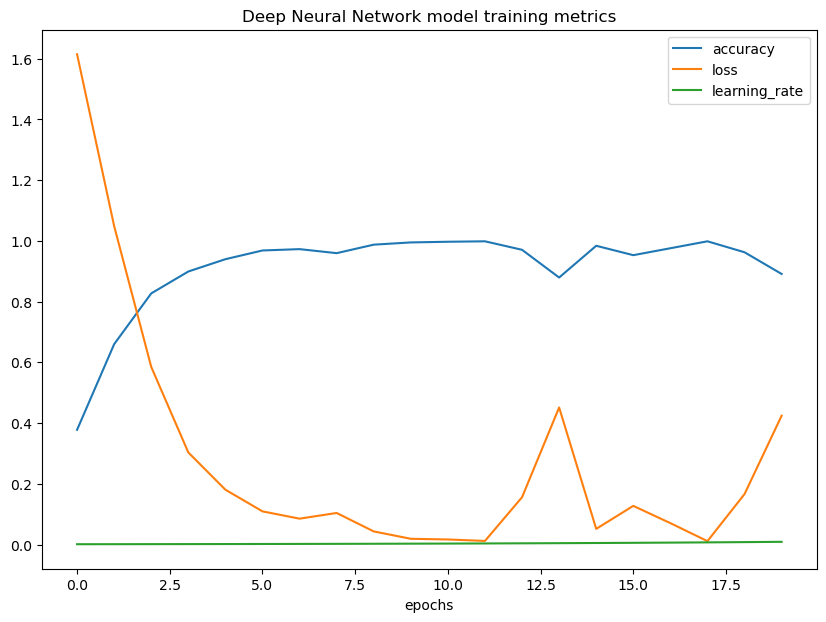

In [28]:
# Plot train metrics
df_train = pd.DataFrame(history.history)
df_train[['accuracy', 'loss', 'learning_rate']].plot(figsize=(10,7), xlabel="epochs", title="Deep Neural Network model training metrics")

<Axes: title={'center': 'Deep Neural Network model testing metrics'}, xlabel='epochs'>

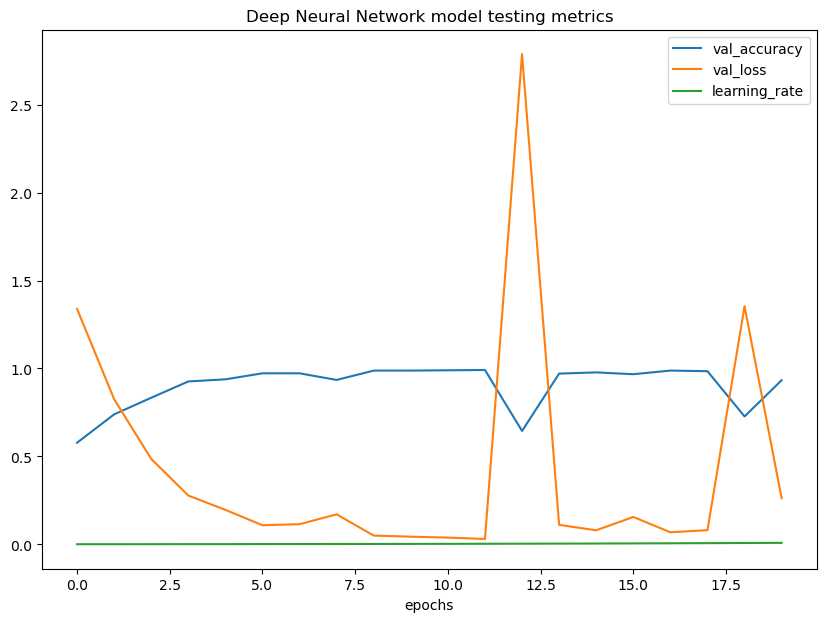

In [29]:
#Plot test metrics
df_val = pd.DataFrame(history.history)
df_val[['val_accuracy', 'val_loss', 'learning_rate']].plot(figsize=(10,7), xlabel="epochs", title="Deep Neural Network model testing metrics")

In [30]:
# Check the accuracy of our model
loss, accuracy = dnn_model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.9298 - loss: 0.2451
Model loss on test set: 0.26281556487083435
Model accuracy on test set: 93.31%


In [31]:
# Make predictions and get list of prediction probabilities,or 
# a number for how likely it thinks a particular class is to be the label.
#The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.
y_probs = dnn_model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step


In [32]:
# Convert all of the predictions from probabilities to labels, so we can plot the confusion matrix
#argmax: Returns the indices of the maximum values along an axis. (To find the highest value we can use the argmax() method)
y_preds = y_probs.argmax(axis=1)


In [33]:
# Basic confusion matrix
confusion_matrix(y_true=y_test,
                 y_pred=y_preds)

array([[116,   1,   0,   0,   0,   0,   0],
       [  0,  20,   0,   0,   0,   0,   0],
       [  2,  13,  94,   6,   0,   0,   0],
       [  0,   0,   1, 191,   8,   0,   0],
       [  0,   0,   0,   0,  54,   0,   0],
       [  0,   0,   0,   0,   0,  14,   8],
       [  0,   0,   0,   0,   0,   0,  55]])

In [34]:
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [35]:
target_fault_names=['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

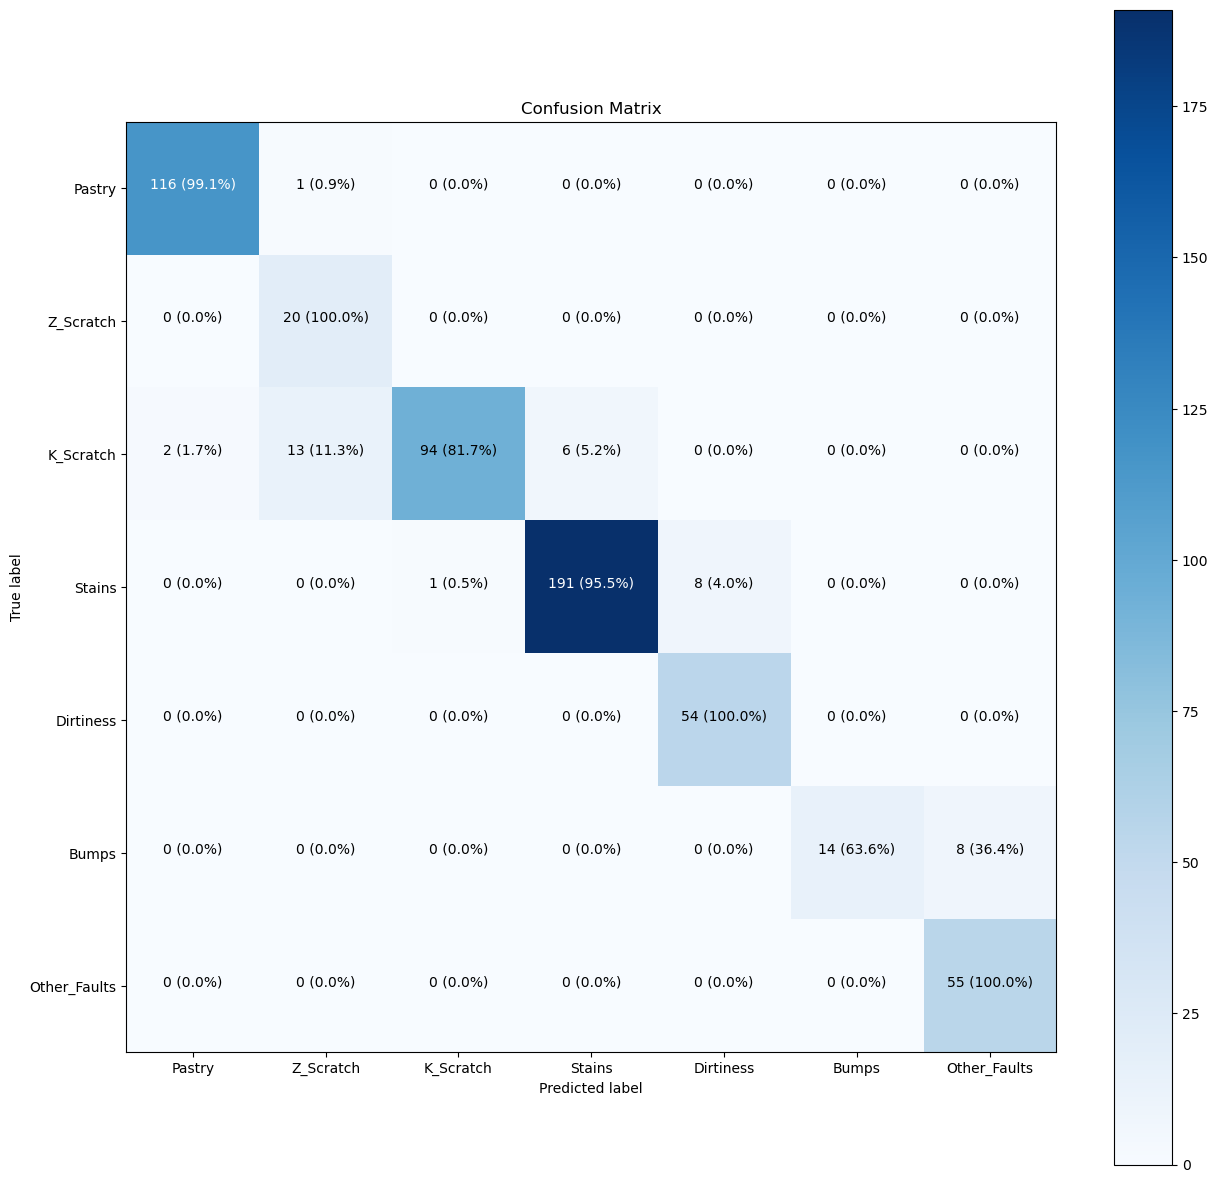

In [36]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=target_fault_names,
                      figsize=(15, 15),
                      text_size=10)